In [1]:
# importing warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [3]:
# importing NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [4]:
df = pd.read_csv("Email.csv")

In [5]:
df.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [6]:
# rename the Body column to 'Text'
df.rename(columns={'Body':'Text'}, inplace=True)

In [7]:
df.shape

(6046, 3)

In [8]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Text        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


In [10]:
df.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

In [11]:
df.head()

,Text,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [12]:
#check for null values
df.isnull().sum()

Text     1
Label    0
dtype: int64

In [13]:
# removing null values
df.dropna(inplace=True)

In [14]:
df.shape

(6045, 2)

In [15]:
# check for duplicates
df.duplicated().sum()

752

In [16]:
# removing duplicates 
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

## 2. EDA

In [18]:
df['Label'].value_counts()

0    3915
1    1378
Name: Label, dtype: int64

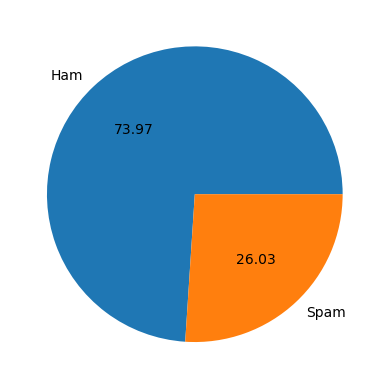

In [19]:
plt.pie(df['Label'].value_counts(), labels=['Ham','Spam'],autopct='%.2f')
plt.show()

Data is imbalance : Ham % >> Spam %

In [20]:
# creating column for characters count
df['num_characters'] = df['Text'].apply(len)

In [21]:
# creating column for word count
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [22]:
# creating column for sentence count
df['num_sentence'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,Text,Label,num_characters,num_words,num_sentence
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191,12
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139,5
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113,4
3,##############################################...,1,2863,690,35
4,I thought you might like these:\n1) Slim Down ...,1,641,108,4


In [24]:
# ham mail statistical analysis
df[df['Label'] == 0].describe()

,Label,num_characters,num_words,num_sentence
count,3915.0,3915.000000,3915.000000,3915.000000
mean,0.0,1792.657471,340.489911,11.411239
std,0.0,5025.721947,776.128871,25.970404
min,0.0,5.000000,1.000000,1.000000
25%,0.0,522.000000,97.000000,3.000000
50%,0.0,960.000000,189.000000,6.000000
75%,0.0,1650.000000,328.000000,11.000000
max,0.0,194978.000000,18564.000000,808.000000


In [25]:
# spam mail statistical analysis
df[df['Label'] == 1].describe()

,Label,num_characters,num_words,num_sentence
count,1378.0,1378.000000,1378.000000,1378.000000
mean,1.0,2388.280116,428.534107,16.461538
std,0.0,5745.835985,875.805064,32.426448
min,1.0,1.000000,0.000000,0.000000
25%,1.0,675.250000,120.000000,5.000000
50%,1.0,1094.500000,201.000000,9.000000
75%,1.0,2168.000000,408.500000,15.000000
max,1.0,129635.000000,13288.000000,404.000000


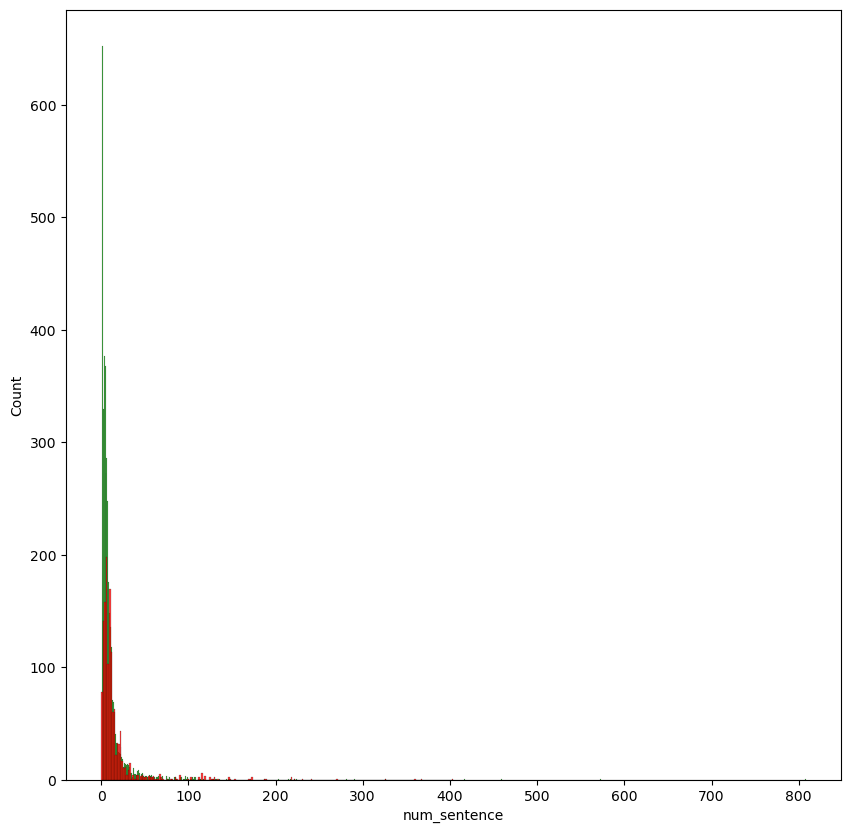

In [26]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['Label']==0]['num_sentence'], color= 'green')
sns.histplot(df[df['Label']==1]['num_sentence'], color= 'red')
plt.show()

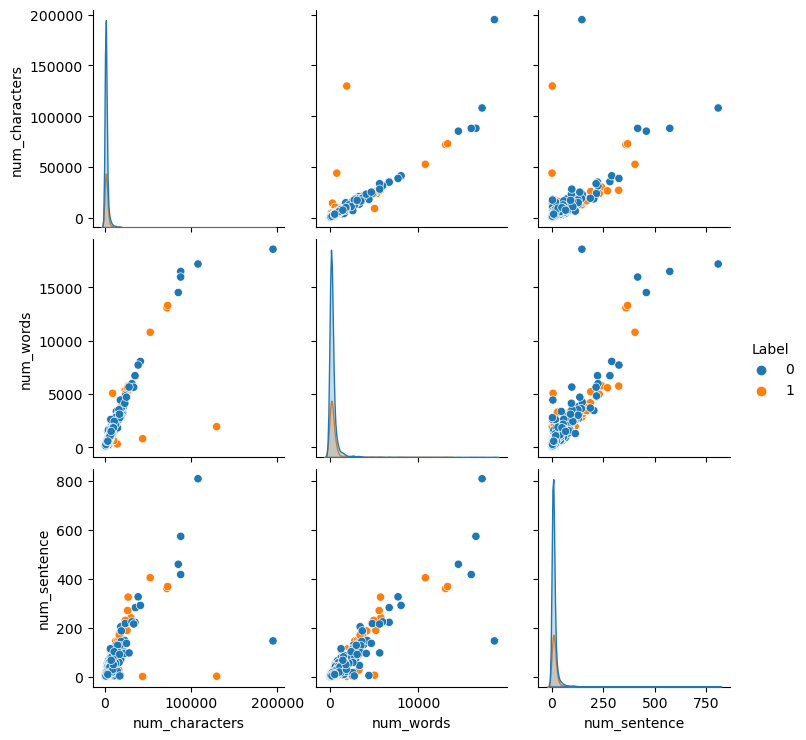

In [27]:
sns.pairplot(df,hue='Label')

<Axes: >

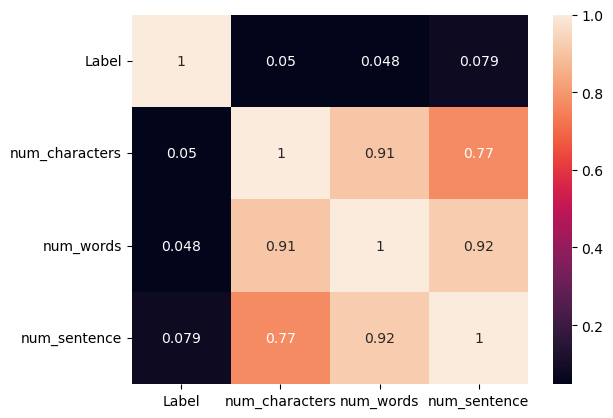

In [28]:
sns.heatmap(df.corr(),annot=True)

here data is highly correlated

## 3. Data Preprocessing
- Lowercase
- Toenization
- Removing special characters
- Removing stopwords and punctuation

In [29]:
def transform_text(text):
    # word to lowercase
    text = text.lower()
    
    # tokenizing the text
    text = nltk.word_tokenize(text)
    
    # creating an empty list to store processed text
    procesed_text = []
    
    #removing alphanumeric / special characters
    for word in text:
        if word.isalnum():
            procesed_text.append(word)
            
    # copying processed text to text
    text = procesed_text[:]
    procesed_text.clear()
    
    # removing stopwords
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            procesed_text.append(word)
    
    # stemming
    text = procesed_text[:]
    procesed_text.clear()
    ps = PorterStemmer()
    for word in text:
        procesed_text.append(ps.stem(word))
    return " ".join(procesed_text)

In [30]:
transform_text('Ritesh learned machine advanced and learned from Anderw')

'ritesh learn machin advanc learn anderw'

In [31]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [32]:
df.head()

,Text,Label,num_characters,num_words,num_sentence,transformed_text
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191,12,save 70 life insur spend life quot save ensur ...
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139,5,1 fight risk cancer http slim guarante lose lb...
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113,4,1 fight risk cancer http slim guarante lose lb...
3,##############################################...,1,2863,690,35,adult club offer free membership instant acces...
4,I thought you might like these:\n1) Slim Down ...,1,641,108,4,thought might like 1 slim guarante lose lb 30 ...


In [33]:
from wordcloud import WordCloud
wc = WordCloud(width = 600, height=500, min_font_size=10, background_color='white')

In [34]:
spam_wc = wc.generate(df[df['Label'] == 1]['transformed_text'].str.cat(sep=' '))

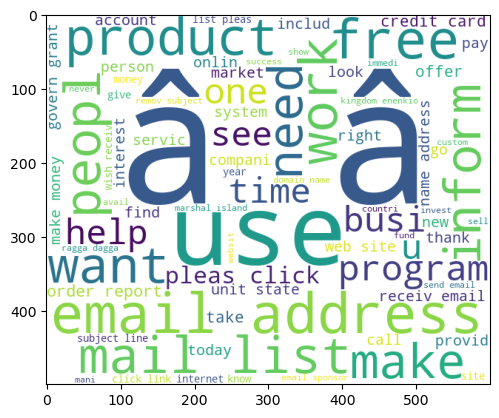

In [35]:
#plt.figure(figsize=(8, 6))
plt.imshow(spam_wc)

In [36]:
ham_wc = wc.generate(df[df['Label'] == 0]['transformed_text'].str.cat(sep=' '))

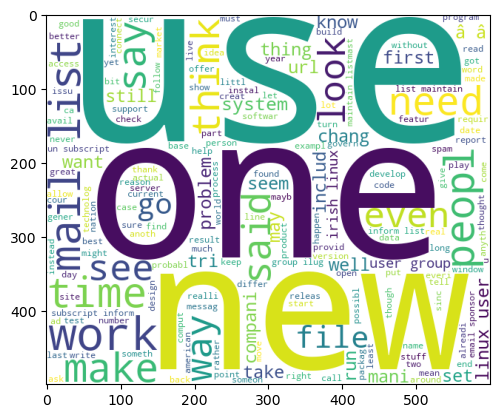

In [37]:
plt.imshow(ham_wc)

In [38]:
spam_corpus = []
for msg in df[df['Label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [39]:
len(spam_corpus)

252420

In [40]:
from collections import Counter

# creating a dataframe top 30 spam words 
top_30_spam =pd.DataFrame(Counter(spam_corpus).most_common(30))

In [41]:
top_30_spam.rename(columns= {0:'word', 1:'count'}, inplace=True)

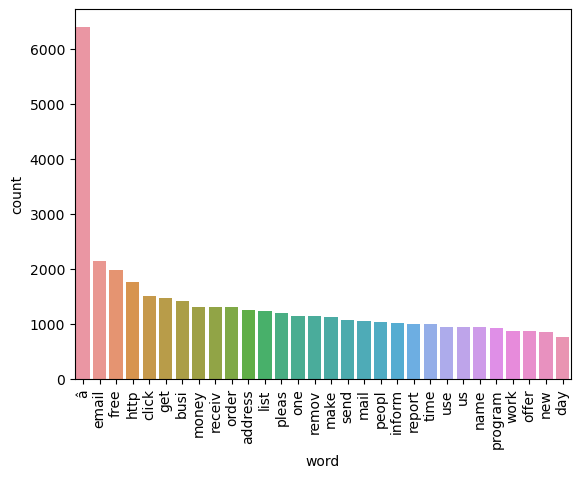

In [42]:
sns.barplot(data = top_30_spam, x= 'word', y= 'count')
plt.xticks(rotation= 'vertical')
plt.show()

In [43]:
ham_corpus = []
for msg in df[df['Label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [44]:
len(ham_corpus)

544796

In [45]:
# topm ham words in a dataframe
top_30_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))

In [46]:
top_30_ham.rename(columns={0:'word', 1:'count'}, inplace= True)

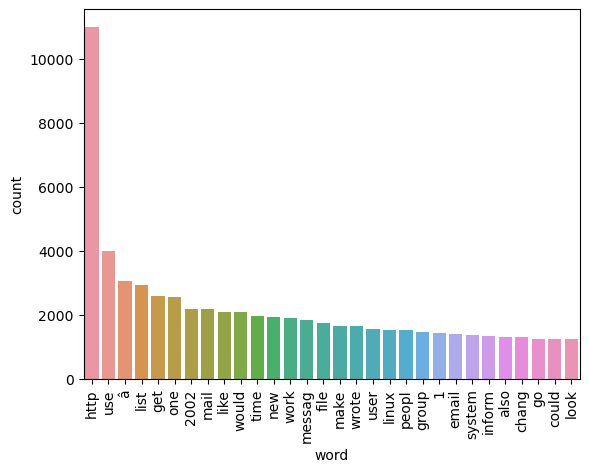

In [47]:
sns.barplot(data= top_30_ham, x= 'word', y= 'count')
plt.xticks(rotation= 'vertical')
plt.show()

## 4. Feature Engineering

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [49]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [50]:
X.shape

(5293, 36888)

In [51]:
y = df['Label'].values

In [52]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

In [56]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [57]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy : ", accuracy_score(y_test,y_pred1))
print("confusion matrix : \n", confusion_matrix(y_test, y_pred1))
print("precision score", precision_score(y_test, y_pred1))
print("f1_score", f1_score(y_test, y_pred1))


accuracy :  0.9348441926345609
confusion matrix : 
 [[745  26]
 [ 43 245]]
precision score 0.9040590405904059
f1_score 0.8765652951699463


In [58]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy : ", accuracy_score(y_test,y_pred2))
print("confusion matrix : \n", confusion_matrix(y_test, y_pred2))
print("precision score", precision_score(y_test, y_pred2))
print("f1_score", f1_score(y_test, y_pred2))

accuracy :  0.9046270066100094
confusion matrix : 
 [[771   0]
 [101 187]]
precision score 1.0
f1_score 0.7873684210526316


In [59]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy : ", accuracy_score(y_test,y_pred3))
print("confusion matrix : \n", confusion_matrix(y_test, y_pred3))
print("precision score", precision_score(y_test, y_pred3))
print("f1_score", f1_score(y_test, y_pred3))


accuracy :  0.8932955618508026
confusion matrix : 
 [[745  26]
 [ 87 201]]
precision score 0.8854625550660793
f1_score 0.7805825242718447


#### chose mnb with tfidf feature

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [61]:
lrc = LogisticRegression(solver= 'liblinear', penalty= 'l1')
svc = SVC(kernel='sigmoid', gamma= 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
gdbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [62]:
clfs = {
    'SVC' : svc,
    'KNN' : knc,
    'Naive Bayes' : mnb,
    'Decision Tree' : dtc,
    'logistic Regression' : lrc,
    'Random forrest' : rfc,
    'Adaboost' : abc,
    'Gradient boosting' : gdbc,
    'Xgboost' : xgb,
    'Bagging' : bc
}

In [63]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    
    return accuracy, precision, f1score

In [64]:
train_classifier(lrc, X_train, y_train, X_test, y_test)

(0.9584513692162417, 0.9765625, 0.9191176470588235)

In [65]:
accuracy_scores = []
precision_scores = []
f1_scores = []
for name,clf in clfs.items():
    current_accuracy, current_precision, current_f1_score = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    print("f1_score - ", current_f1_score)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1_score)

For  SVC
Accuracy -  0.9745042492917847
Precision -  0.9711191335740073
f1_score -  0.9522123893805311
For  KNN
Accuracy -  0.8772426817752597
Precision -  0.6965174129353234
f1_score -  0.8115942028985508
For  Naive Bayes
Accuracy -  0.9046270066100094
Precision -  1.0
f1_score -  0.7873684210526316
For  Decision Tree
Accuracy -  0.9112370160528801
Precision -  0.9217391304347826
f1_score -  0.8185328185328187
For  logistic Regression
Accuracy -  0.9584513692162417
Precision -  0.9765625
f1_score -  0.9191176470588235
For  Random forrest
Accuracy -  0.9707271010387157
Precision -  0.9885931558935361
f1_score -  0.9437386569872959
For  Adaboost
Accuracy -  0.9546742209631728
Precision -  0.9166666666666666
f1_score -  0.9166666666666666
For  Gradient boosting
Accuracy -  0.943342776203966
Precision -  0.9596774193548387
f1_score -  0.8880597014925373
For  Xgboost
Accuracy -  0.9641170915958451
Precision -  0.9528985507246377
f1_score -  0.9326241134751774
For  Bagging
Accuracy -  0.953

In [66]:
model_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores, 'f1_score': f1_scores}).sort_values('f1_score', ascending=False)

In [67]:
model_df

,Algorithm,Accuracy,Precision,f1_score
0,SVC,0.974504,0.971119,0.952212
5,Random forrest,0.970727,0.988593,0.943739
8,Xgboost,0.964117,0.952899,0.932624
4,logistic Regression,0.958451,0.976562,0.919118
6,Adaboost,0.954674,0.916667,0.916667
9,Bagging,0.953730,0.931408,0.913274
7,Gradient boosting,0.943343,0.959677,0.888060
3,Decision Tree,0.911237,0.921739,0.818533
1,KNN,0.877243,0.696517,0.811594
2,Naive Bayes,0.904627,1.000000,0.787368


In [68]:
 model_df1 = pd.melt(model_df, id_vars = 'Algorithm')

In [69]:
model_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.974504
1,Random forrest,Accuracy,0.970727
2,Xgboost,Accuracy,0.964117
3,logistic Regression,Accuracy,0.958451
4,Adaboost,Accuracy,0.954674
5,Bagging,Accuracy,0.953730
6,Gradient boosting,Accuracy,0.943343
7,Decision Tree,Accuracy,0.911237
8,KNN,Accuracy,0.877243
9,Naive Bayes,Accuracy,0.904627


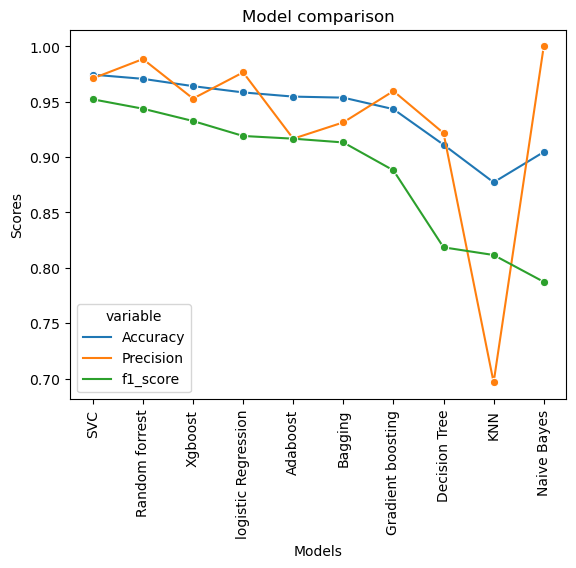

In [70]:
sns.lineplot(data= model_df1, x='Algorithm', y='value',hue='variable',marker='o')
plt.xticks(rotation='vertical')
plt.title('Model comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.show()

In [71]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(svc, open('model.pkl', 'wb'))